In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import joblib 

In [2]:
filepath=r"C:\Users\CSIO\Desktop\Diabetic Foot Research\Machine Learning Implementation\dataset_with_4_classes\combined_data\final.csv"
data=pd.read_csv(filepath)
data

,MTK1.T,MTK2.T,MTK3.T,MTK4.T,MTK5.T,D1.T,L.T,C.T,max_temp,min_temp,temp_range,condition
0,0.983221,1.579631,1.926185,2.091407,1.760453,0.619983,1.272439,0.915525,2.091407,0.619983,1.471423,0
1,0.125197,0.094649,0.608958,0.700101,1.500195,0.227996,1.762956,2.435764,2.435764,0.094649,2.341115,0
2,0.335517,0.938675,0.493425,0.343672,1.189942,1.257875,1.669362,1.263756,1.669362,0.335517,1.333844,0
3,0.343761,0.276866,0.537738,0.246287,1.398624,1.630739,0.438513,0.423720,1.630739,0.246287,1.384452,0
4,0.704690,1.595115,1.218438,0.859128,1.165247,0.722619,1.235193,3.400332,3.400332,0.704690,2.695642,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.572060,0.651480,0.323167,2.548236,1.137525,3.652500,0.942357,0.385682,3.652500,0.323167,3.329333,1
74,1.643545,2.232720,2.246896,1.983081,1.971958,1.429466,1.704914,1.288972,2.246896,1.288972,0.957924,0
75,0.381049,1.013439,0.216111,0.816165,1.821659,1.642428,1.033259,0.374977,1.821659,0.216111,1.605548,0
76,0.609831,0.426914,1.071384,1.597074,2.917671,0.594115,3.530871,2.749073,3.530871,0.426914,3.103957,1


In [3]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['condition'])
y=data['condition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [4]:
knn_model=joblib.load('./knn_model.h5')
svm_model=joblib.load('./svm_model.h5')
logreg_model=joblib.load('./logreg_model.h5')
lgbm_model=joblib.load('./lightgbm_model.h5')

In [5]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('knn', knn_model),
        ('svm', svm_model),
        ('logreg', logreg_model),
        ('lgbm',lgbm_model)
    ],
    voting='hard'# or 'soft' if models give probabilities
)

ensemble.fit(X_train, y_train)
ensemble_acc = ensemble.score(X_test, y_test)
print("Ensemble test accuracy:", ensemble_acc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 3/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.714 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.714 total time=   0.0s
[CV 1/5] END C=0.1

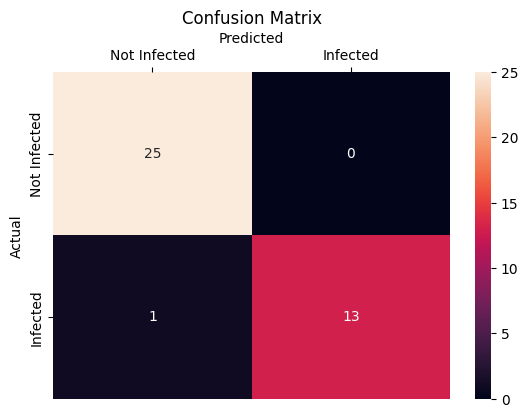

Accuracy: 97.436
Precision: 100.000
Sensitivity (Recall): 96.154
F1-Score: 98.039


In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
actual=y_test
predicted=ensemble.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected', 'Infected'],
           yticklabels=['Not Infected', 'Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Accuracy: {accuracy*100:.3f}")
print(f"Precision: {precision*100:.3f}")
print(f"Sensitivity (Recall): {recall*100:.3f}")
print(f"F1-Score: {f1_score*100:.3f}")

In [7]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.93      0.96        14

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39



In [8]:
import joblib
joblib.dump(ensemble,'./ensemble_model.h5')
print("Model saved")

Model saved


In [9]:
import warnings
warnings.filterwarnings("ignore")
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
cond=ensemble.predict(values)
print(cond)

[0]


In [10]:
values=[[3.1,2.2,0.3,4.4,0.5,0.6,0.7,0.8,4.4,0.3,4.1]]
cond=ensemble.predict(values)
print(cond)

[1]


In [11]:
values=[[2.0,2.0,2.3,2.4,2.5,2.6,0.7,0.8,2.6,0.7,1.9]]
cond=ensemble.predict(values)
print(cond)

[0]


In [12]:
values=[[6.1,2.2,0.3,0.4,0.5,0.6,9.7,0.8,6.1,0.3,5.8]]
cond=ensemble.predict(values)
print(cond)

[1]


In [13]:
values=[[3.5,0.2,2.3,2.4,2.5,1.6,2.7,0.8,3.5,0.2,3.3]]
cond=ensemble.predict(values)
print(cond)

[1]


In [14]:
values=[[3,3,3,3,3,3,3,3,3,3,0]]
cond=ensemble.predict(values)
print(cond)

[1]


In [15]:
values=[[0,0,0,0,0,0,0,0,0,0,0]]
cond=ensemble.predict(values)
print(cond)

[0]


In [16]:
values=[[0,0.1,0,0.3,0.4,0,0,0,0.4,0.1,0.3]]
cond=ensemble.predict(values)
print(cond)

[0]


In [17]:
#Failed here
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond=ensemble.predict(values)
print(cond)

[0]


In [18]:
values=[[3.5,0.2,2.3,2.4,2.5,1.6,2.7,0.8,3.5,0.2,3.3]]
cond=ensemble.predict(values)
print(cond)

[1]


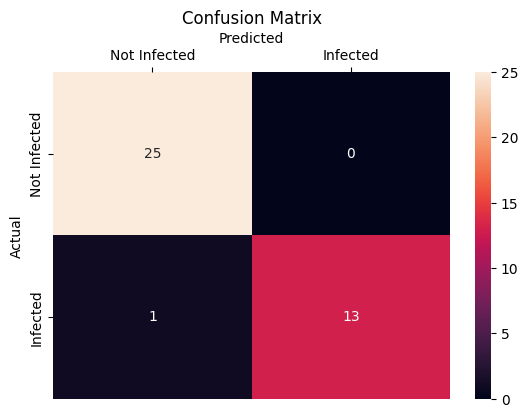

Accuracy: 97.436%
Precision: 100.000%
Sensitivity (Recall): 96.154%
F1-Score: 98.039%


In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

actual=y_test
predicted=ensemble.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected','Infected'],
           yticklabels=['Not Infected','Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy*100:.3f}%")
print(f"Precision: {precision*100:.3f}%")
print(f"Sensitivity (Recall): {recall*100:.3f}%")
print(f"F1-Score: {f1_score*100:.3f}%")

In [21]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression 
stacking = StackingClassifier(
    estimators=[
        ('knn', knn_model),
        ('svm', svm_model),
        ('logreg', logreg_model),
    ],
    final_estimator=LogisticRegression(max_iter=1000)
)

# Fit on training data
stacking.fit(X_train, y_train)
ensemble_acc = stacking.score(X_test, y_test)
print("Ensemble test accuracy:", ensemble_acc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 3/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.714 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.714 total time=   0.0s
[CV 1/5] END C=0.1

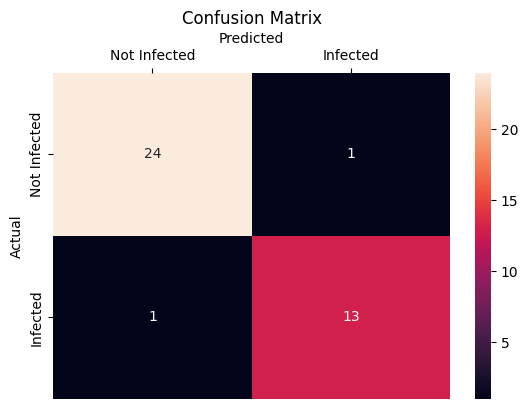

Accuracy: 94.872%
Precision: 96.000%
Sensitivity (Recall): 96.000%
F1-Score: 96.000%


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

actual=y_test
predicted=stacking.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected','Infected'],
           yticklabels=['Not Infected','Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy*100:.3f}%")
print(f"Precision: {precision*100:.3f}%")
print(f"Sensitivity (Recall): {recall*100:.3f}%")
print(f"F1-Score: {f1_score*100:.3f}%")

In [23]:
def predict_and_plot(patient, model, values):
    if(patient == 'normal'):
        prediction = model.predict(values)
        if(prediction == 0):
            print("Patient is Normal")

        if(prediction == 0 and max(values[0]) >= 3):
            print("Model made wrong prediction....Patient is non-diabetic but has other disease/foot ulcer")
            x = ['MTK1.T', 'MTK2.T', 'MTK3.T', 'MTK4.T', 'MTK5.T', 'D1.T', 'L.T', 'C.T']
            y = values[0][:-3]

            high_temp_features = [(feature, val) for feature, val in zip(x, y) if val >= 3]
            plt.figure(figsize=(8, 6))
            plt.plot(x, y, marker='o')
            plt.title("Temperature difference sensor readings")
            plt.xlabel("Sensor")
            plt.ylabel("Value")
            plt.grid(True)

            for feature, val in high_temp_features:
                plt.annotate(
                    f"{val}",
                    xy=(feature, val),
                    xytext=(feature, val + 0.2),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    ha='center', color='red'
                )
            plt.show()

            print(f"Patient is non-diabetic but might develop ulcer/infection on the following regions:")
            for feature, val in high_temp_features:
                print(f" {feature}: temperature difference = {val}")
        else:
            # Otherwise, predicted correctly or other conditions
            x = ['MTK1.T', 'MTK2.T', 'MTK3.T', 'MTK4.T', 'MTK5.T', 'D1.T', 'L.T', 'C.T']
            y = values[0][:-3]

            high_temp_features = [(feature, val) for feature, val in zip(x, y) if val >= 3]
            plt.figure(figsize=(8, 6))
            plt.plot(range(len(x)), y, marker='o')
            plt.xticks(ticks=range(len(x)), labels=x)
            plt.title("Temperature difference sensor readings")
            plt.xlabel("Sensor")
            plt.ylabel("Value")
            plt.grid(True)

            for feature, val in high_temp_features:
                idx = x.index(feature)
                plt.annotate(
                    f"{val}",
                    xy=(idx, val),
                    xytext=(idx, val + 0.2),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    ha='center', color='red'
                )
            plt.show()

            print(f"Patient is non-diabetic but might develop ulcer/infection on the following regions:")
            for feature, val in high_temp_features:
                print(f" {feature}: temperature difference = {val}")

    else:
        prediction = model.predict(values)
        if(prediction == 0):
            print("Patient is Diabetic without foot ulcer.")

        if(prediction == 0 and max(values[0]) >= 3):
            print("Model made wrong prediction....Patient has diabetic foot ulcer")
            x = ['MTK1.T', 'MTK2.T', 'MTK3.T', 'MTK4.T', 'MTK5.T', 'D1.T', 'L.T', 'C.T']
            y = values[0][:-3]

            high_temp_features = [(feature, val) for feature, val in zip(x, y) if val >= 3]
            plt.figure(figsize=(8, 6))
            plt.plot(range(len(x)), y, marker='o')
            plt.xticks(ticks=range(len(x)), labels=x)
            plt.title("Temperature difference sensor readings")
            plt.xlabel("Sensor")
            plt.ylabel("Value")
            plt.grid(True)

            for feature, val in high_temp_features:
                idx = x.index(feature)
                plt.annotate(
                    f"{val}",
                    xy=(idx, val),
                    xytext=(idx, val + 0.2),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    ha='center', color='red'
                )
            plt.show()

            print(f"Patient might develop diabetic foot ulcer on the following regions:")
            for feature, val in high_temp_features:
                if(val >= 3 and val <= 4):
                    print(f" {feature}: temperature difference = {val} and ulcer type: chronic")
                elif(val >= 4 and val <= 5):
                    print(f" {feature}: temperature difference = {val} and ulcer type: mild")
                else:
                    print(f" {feature}: temperature difference = {val} and ulcer type: severe Need Attention!!")
        else:
            x = ['MTK1.T', 'MTK2.T', 'MTK3.T', 'MTK4.T', 'MTK5.T', 'D1.T', 'L.T', 'C.T']
            y = values[0][:-3]

            high_temp_features = [(feature, val) for feature, val in zip(x, y) if val >= 3]
            plt.figure(figsize=(8, 6))
            plt.plot(range(len(x)), y, marker='o')
            plt.xticks(ticks=range(len(x)), labels=x)
            plt.xlabel("Sensor")
            plt.ylabel("Value")
            plt.grid(True)

            for feature, val in high_temp_features:
                idx = x.index(feature)
                plt.annotate(
                    f"{val}",
                    xy=(idx, val),
                    xytext=(idx, val + 0.2),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    ha='center', color='red'
                )
            plt.show()

            print(f"Patient might develop diabetic foot ulcer on the following regions:")
            for feature, val in high_temp_features:
                if(val >= 3 and val <= 4):
                    print(f" {feature}: temperature difference = {val} and ulcer type: chronic")
                elif(val >= 4 and val <= 5):
                    print(f" {feature}: temperature difference = {val} and ulcer type: mild")
                else:
                    print(f" {feature}: temperature difference = {val} and ulcer type: severe Need Attention!!")


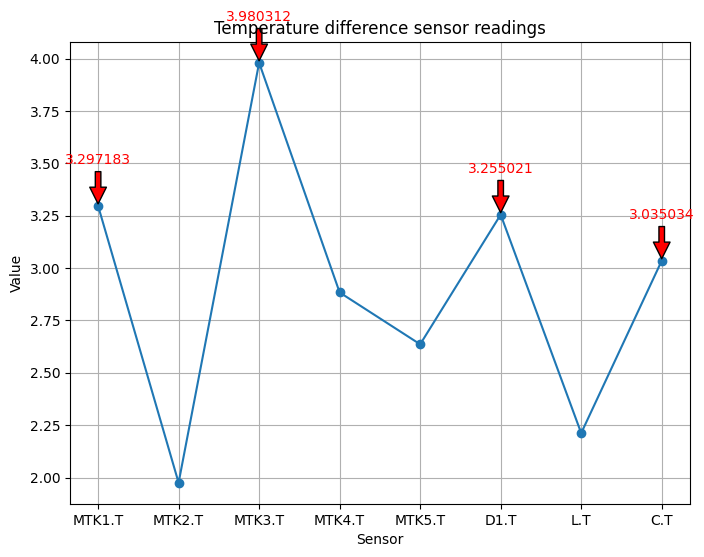

Patient is non-diabetic but might develop ulcer/infection on the following regions:
 MTK1.T: temperature difference = 3.297183
 MTK3.T: temperature difference = 3.980312
 D1.T: temperature difference = 3.255021
 C.T: temperature difference = 3.035034


In [24]:
values = [[3.297183,1.975242,3.980312,2.883603,2.636066,3.255021,2.212102,3.035034,3.980312,1.975242,2.700533]]
cond = predict_and_plot('normal',ensemble,values)

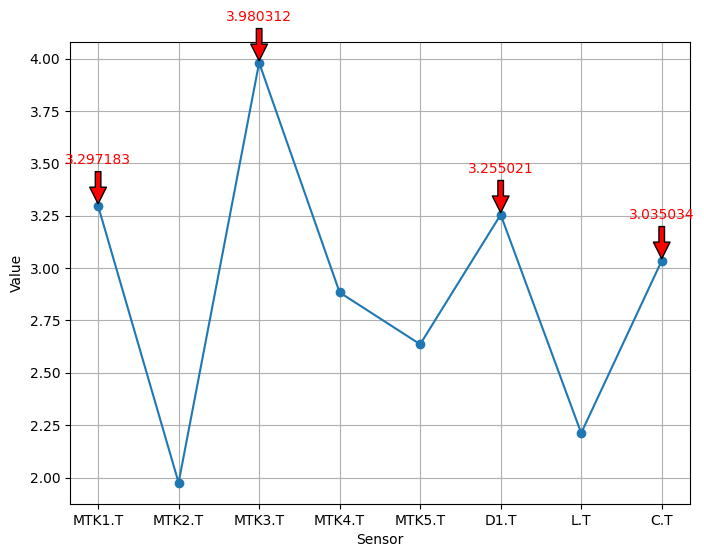

Patient might develop diabetic foot ulcer on the following regions:
 MTK1.T: temperature difference = 3.297183 and ulcer type: chronic
 MTK3.T: temperature difference = 3.980312 and ulcer type: chronic
 D1.T: temperature difference = 3.255021 and ulcer type: chronic
 C.T: temperature difference = 3.035034 and ulcer type: chronic


In [25]:
values = [[3.297183,1.975242,3.980312,2.883603,2.636066,3.255021,2.212102,3.035034,3.980312,1.975242,2.700533]]
cond = predict_and_plot('diabetic',ensemble,values)

Patient is Normal
Model made wrong prediction....Patient is non-diabetic but has other disease/foot ulcer


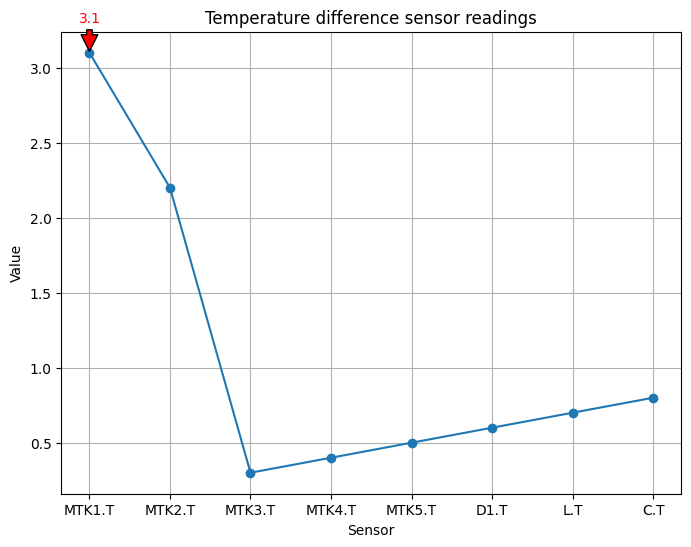

Patient is non-diabetic but might develop ulcer/infection on the following regions:
 MTK1.T: temperature difference = 3.1


In [26]:
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond = predict_and_plot('normal',ensemble,values)

Patient is Diabetic without foot ulcer.
Model made wrong prediction....Patient has diabetic foot ulcer


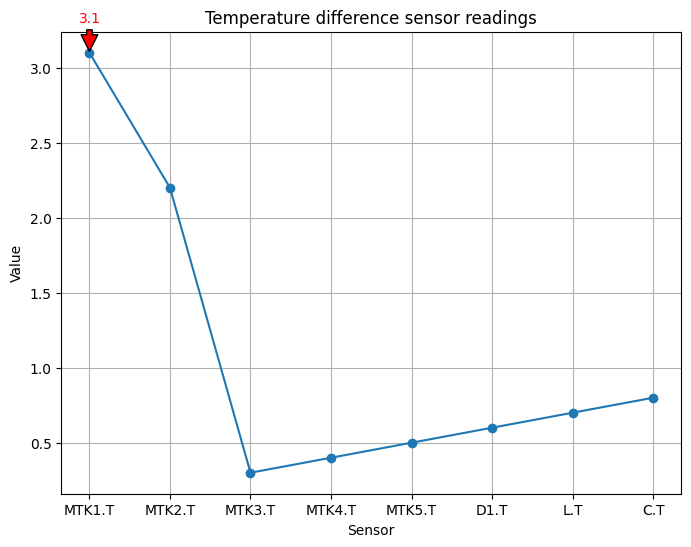

Patient might develop diabetic foot ulcer on the following regions:
 MTK1.T: temperature difference = 3.1 and ulcer type: chronic


In [27]:
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond = predict_and_plot('diabetic',ensemble,values)

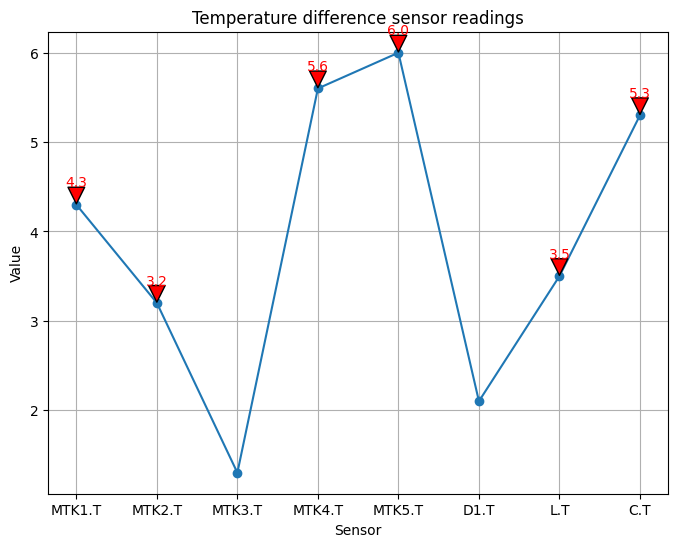

Patient is non-diabetic but might develop ulcer/infection on the following regions:
 MTK1.T: temperature difference = 4.3
 MTK2.T: temperature difference = 3.2
 MTK4.T: temperature difference = 5.6
 MTK5.T: temperature difference = 6.0
 L.T: temperature difference = 3.5
 C.T: temperature difference = 5.3


In [28]:
values = [[4.3,3.2,1.3,5.6,6.0,2.1,3.5,5.3,6.0,1.3,4.7]]
cond = predict_and_plot('normal',ensemble,values)

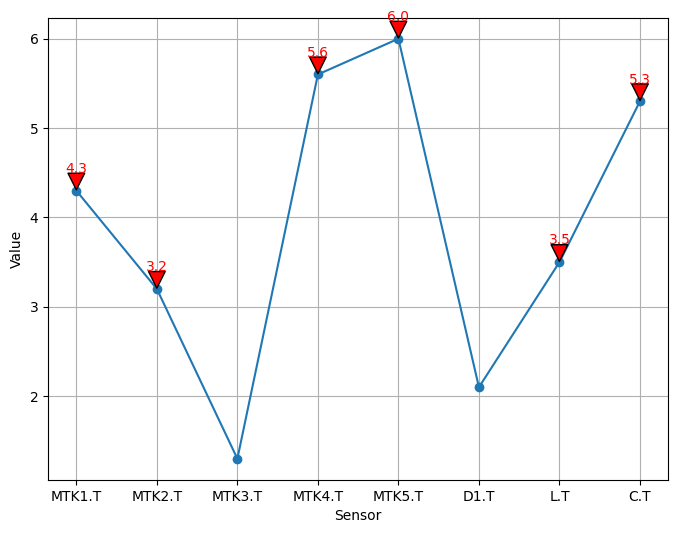

Patient might develop diabetic foot ulcer on the following regions:
 MTK1.T: temperature difference = 4.3 and ulcer type: mild
 MTK2.T: temperature difference = 3.2 and ulcer type: chronic
 MTK4.T: temperature difference = 5.6 and ulcer type: severe Need Attention!!
 MTK5.T: temperature difference = 6.0 and ulcer type: severe Need Attention!!
 L.T: temperature difference = 3.5 and ulcer type: chronic
 C.T: temperature difference = 5.3 and ulcer type: severe Need Attention!!


In [29]:
values = [[4.3,3.2,1.3,5.6,6.0,2.1,3.5,5.3,6.0,1.3,4.7]]
cond = predict_and_plot('diabetic',ensemble,values)

In [30]:
import joblib 
joblib.dump(ensemble,'./ensemble_model.h5')
print("Model saved")

Model saved
